# Data Visualization

# Apple Health Data

# Step Count

Dataset Information:
+-------------------+-----------------------------------------------------------+
|     Attribute     |                           Value                           |
+-------------------+-----------------------------------------------------------+
| Number of Entries |                           1321                            |
| Number of Columns |                             2                             |
|      Columns      |                   ['date', 'StepCount']                   |
|  Non-Null Counts  |             {'date': 1321, 'StepCount': 1321}             |
|    Data Types     | {'date': dtype('<M8[ns]'), 'StepCount': dtype('float64')} |
| Memory Usage (KB) |                           20.77                           |
+-------------------+-----------------------------------------------------------+

Descriptive Statistics:
+-----------+--------+-------------------------------+---------------------+---------------------+---------------------+--------------

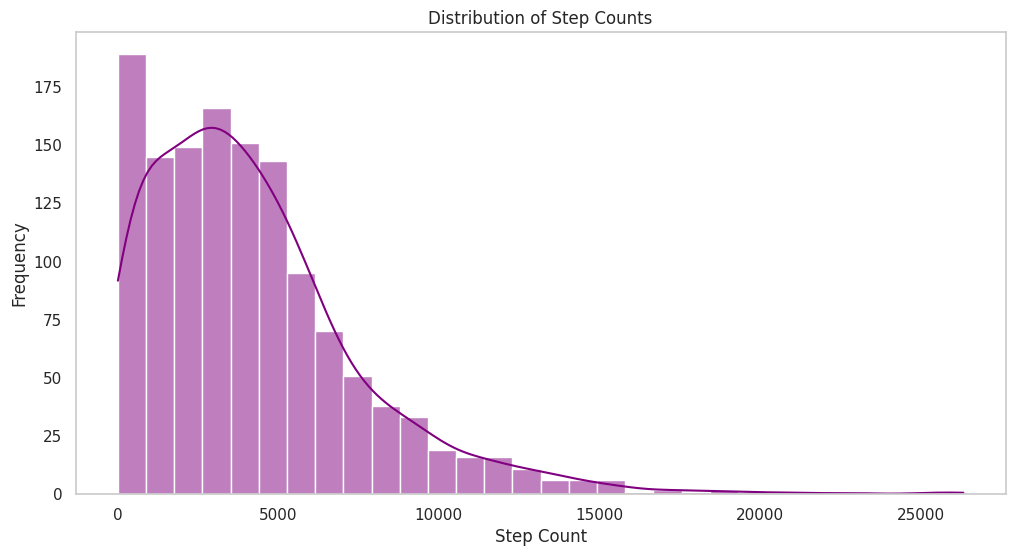

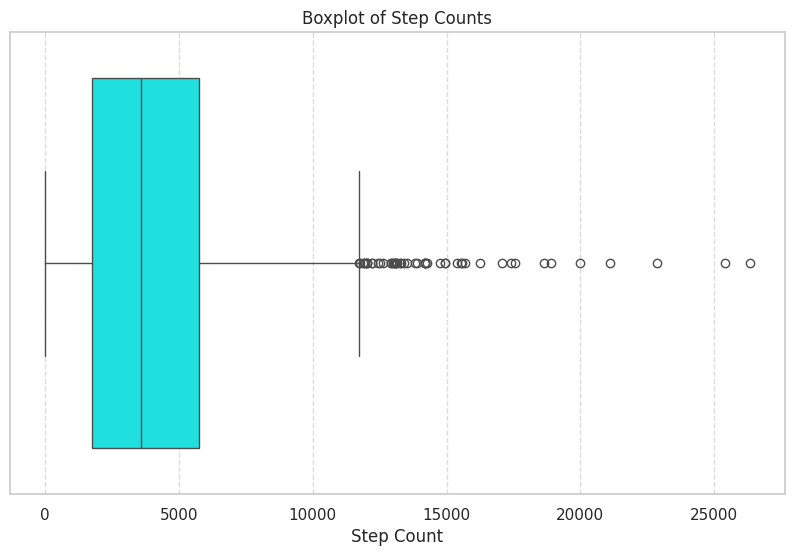

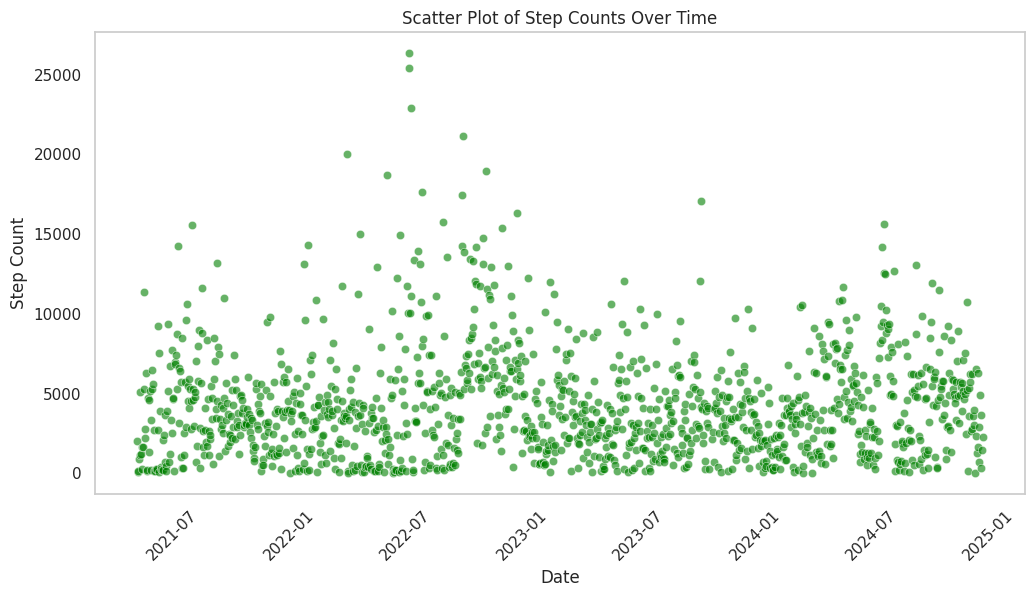

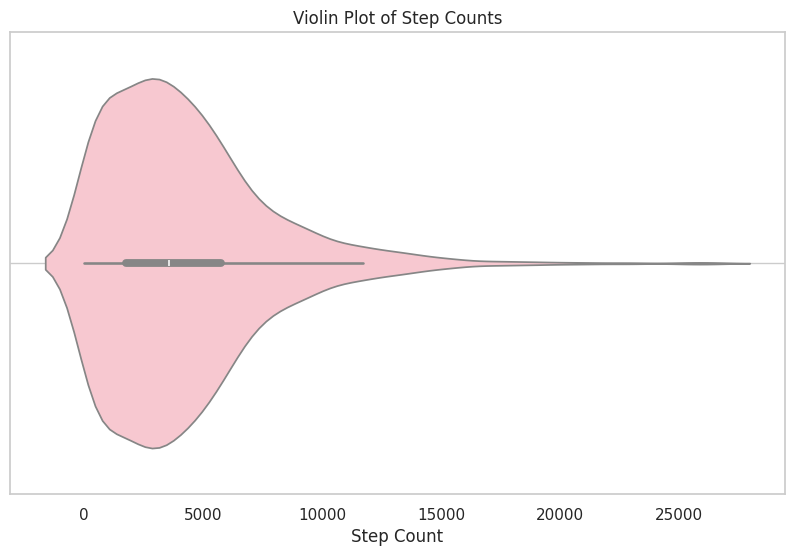

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # To display tables neatly

# Load the dataset
data = pd.read_csv("stepcount_data.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Rename columns for clarity
data.rename(columns={'value': 'StepCount'}, inplace=True)

# Dataset Information
dataset_info = {
    "Number of Entries": len(data),
    "Number of Columns": len(data.columns),
    "Columns": list(data.columns),
    "Non-Null Counts": data.count().to_dict(),
    "Data Types": data.dtypes.to_dict(),
    "Memory Usage (KB)": round(data.memory_usage(deep=True).sum() / 1024, 2),
}
print("Dataset Information:")
print(tabulate(dataset_info.items(), headers=["Attribute", "Value"], tablefmt="pretty"))

# Descriptive Statistics
descriptive_stats = data.describe(include='all').transpose()
print("\nDescriptive Statistics:")
print(tabulate(descriptive_stats, headers="keys", tablefmt="pretty"))

# 1. Histogram: Distribution of Step Counts
plt.figure(figsize=(12, 6))
sns.histplot(data['StepCount'], bins=30, kde=True, color='purple')
plt.title("Distribution of Step Counts")
plt.xlabel("Step Count")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 2. Boxplot for Step Counts
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['StepCount'], color='cyan')
plt.title("Boxplot of Step Counts")
plt.xlabel("Step Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Scatter Plot: Step Counts Over Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['date'], y=data['StepCount'], color='green', alpha=0.6)
plt.title("Scatter Plot of Step Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Step Count")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 4. Violin Plot for Step Counts
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['StepCount'], color='pink')
plt.title("Violin Plot of Step Counts")
plt.xlabel("Step Count")
plt.grid()
plt.show()


# Flights Climbed

Dataset Information:
+-------------------+----------------------------------------------------------------+
|     Attribute     |                             Value                              |
+-------------------+----------------------------------------------------------------+
| Number of Entries |                              1192                              |
| Number of Columns |                               2                                |
|      Columns      |                   ['date', 'FlightsClimbed']                   |
|  Non-Null Counts  |             {'date': 1192, 'FlightsClimbed': 1192}             |
|    Data Types     | {'date': dtype('<M8[ns]'), 'FlightsClimbed': dtype('float64')} |
| Memory Usage (KB) |                             18.75                              |
+-------------------+----------------------------------------------------------------+

Descriptive Statistics:
+----------------+--------+-------------------------------+---------------------+---

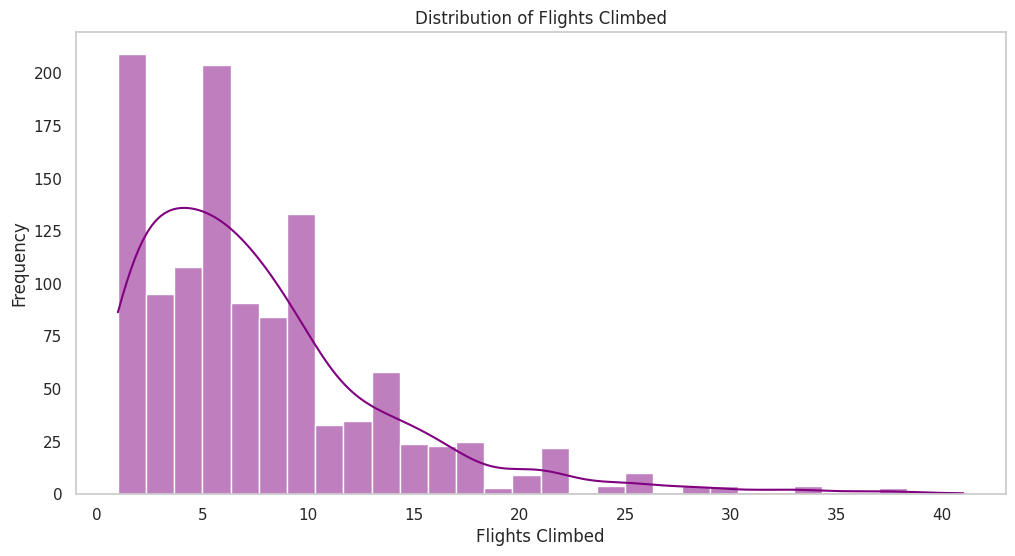

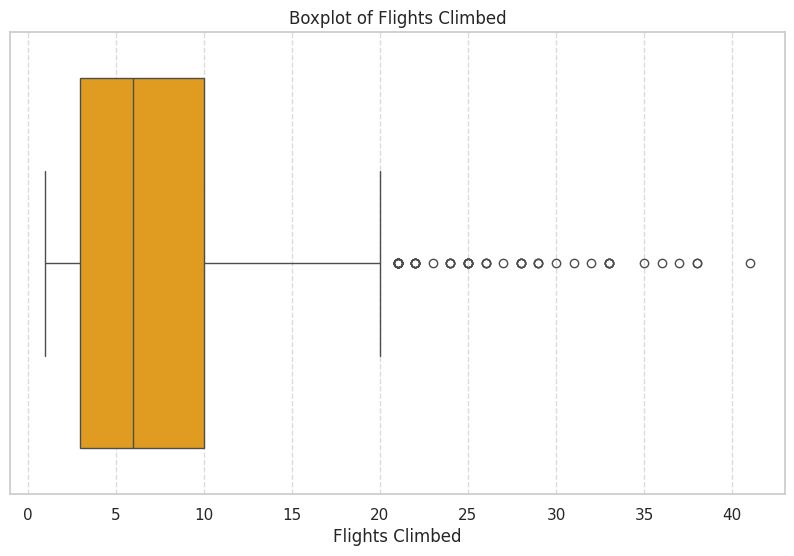

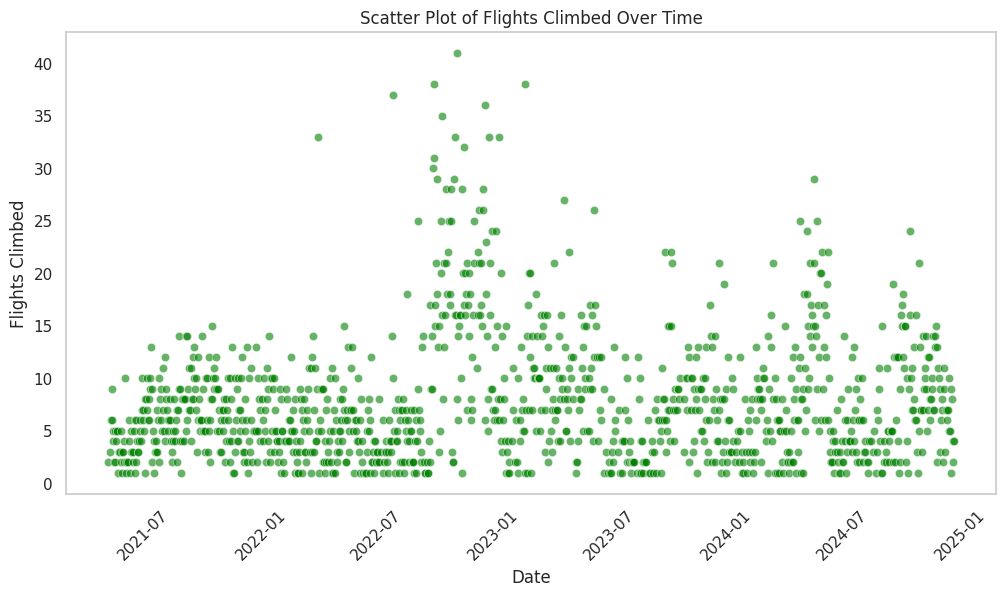

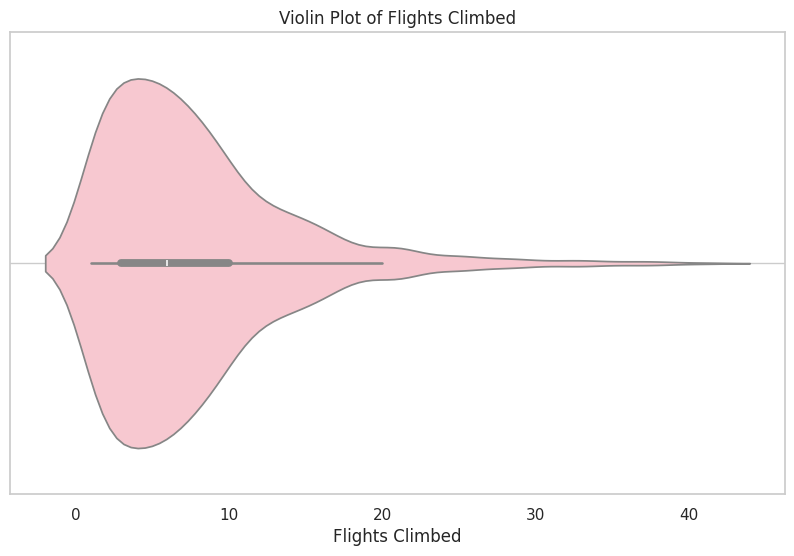

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # To display tables neatly

# Load the dataset
data = pd.read_csv("flightsclimbed_data.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Rename columns for clarity
data.rename(columns={'value': 'FlightsClimbed'}, inplace=True)

# Dataset Information
dataset_info = {
    "Number of Entries": len(data),
    "Number of Columns": len(data.columns),
    "Columns": list(data.columns),
    "Non-Null Counts": data.count().to_dict(),
    "Data Types": data.dtypes.to_dict(),
    "Memory Usage (KB)": round(data.memory_usage(deep=True).sum() / 1024, 2),
}
print("Dataset Information:")
print(tabulate(dataset_info.items(), headers=["Attribute", "Value"], tablefmt="pretty"))

# Descriptive Statistics
descriptive_stats = data.describe(include='all').transpose()
print("\nDescriptive Statistics:")
print(tabulate(descriptive_stats, headers="keys", tablefmt="pretty"))

# 1. Histogram: Distribution of Flights Climbed
plt.figure(figsize=(12, 6))
sns.histplot(data['FlightsClimbed'], bins=30, kde=True, color='purple')
plt.title("Distribution of Flights Climbed")
plt.xlabel("Flights Climbed")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 2. Boxplot for Flights Climbed
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['FlightsClimbed'], color='orange')
plt.title("Boxplot of Flights Climbed")
plt.xlabel("Flights Climbed")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Scatter Plot: Flights Climbed Over Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['date'], y=data['FlightsClimbed'], color='green', alpha=0.6)
plt.title("Scatter Plot of Flights Climbed Over Time")
plt.xlabel("Date")
plt.ylabel("Flights Climbed")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 4. Violin Plot for Flights Climbed
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['FlightsClimbed'], color='pink')
plt.title("Violin Plot of Flights Climbed")
plt.xlabel("Flights Climbed")
plt.grid()
plt.show()


# Walking/Running Distance

Dataset Information:
+-------------------+------------------------------------------------------------------------+
|     Attribute     |                                 Value                                  |
+-------------------+------------------------------------------------------------------------+
| Number of Entries |                                  1321                                  |
| Number of Columns |                                   2                                    |
|      Columns      |                   ['date', 'WalkingRunningDistance']                   |
|  Non-Null Counts  |             {'date': 1321, 'WalkingRunningDistance': 1321}             |
|    Data Types     | {'date': dtype('<M8[ns]'), 'WalkingRunningDistance': dtype('float64')} |
| Memory Usage (KB) |                                 20.77                                  |
+-------------------+------------------------------------------------------------------------+

Descriptive Statistics:
+---

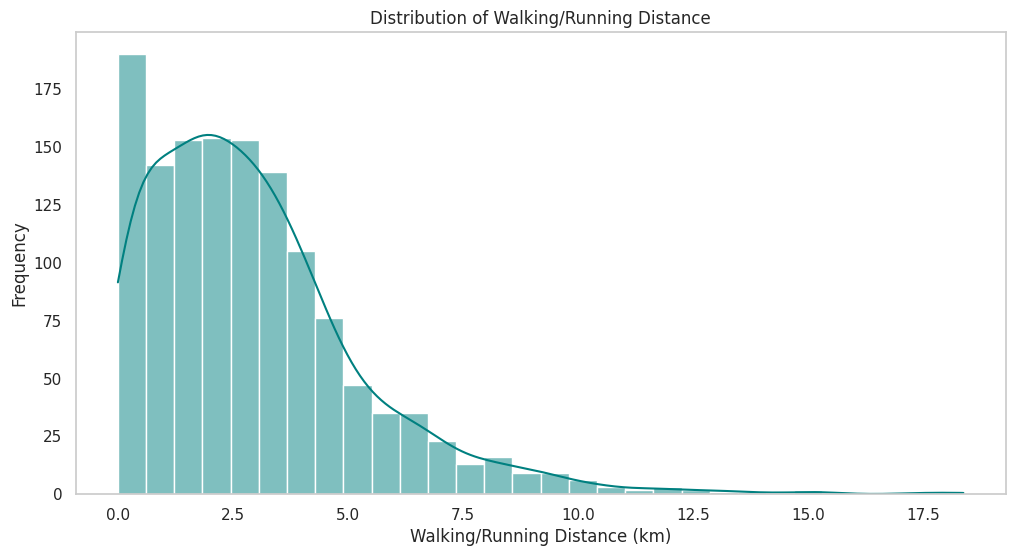

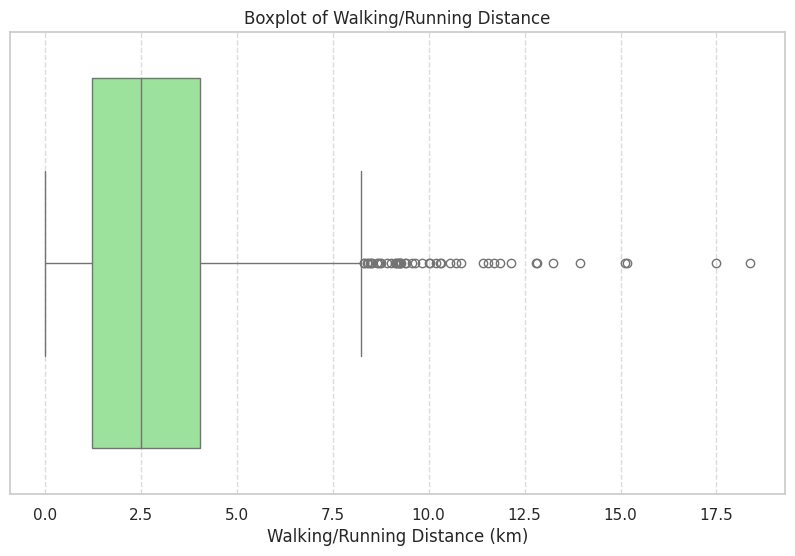

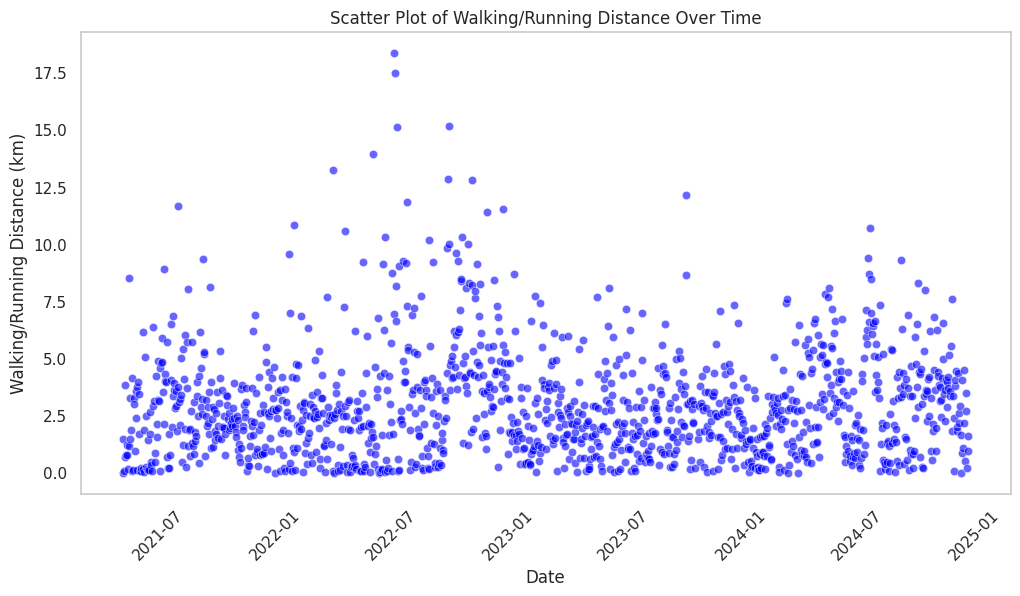

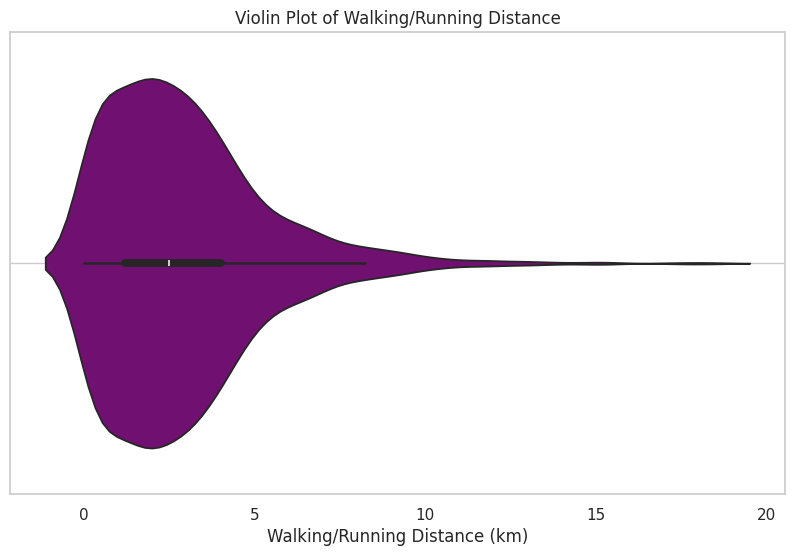

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # For structured table display

# Load the dataset
data = pd.read_csv("distancewalkingrunning_data.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Rename columns for clarity
data.rename(columns={'value': 'WalkingRunningDistance'}, inplace=True)

# Dataset Information
dataset_info = {
    "Number of Entries": len(data),
    "Number of Columns": len(data.columns),
    "Columns": list(data.columns),
    "Non-Null Counts": data.count().to_dict(),
    "Data Types": data.dtypes.to_dict(),
    "Memory Usage (KB)": round(data.memory_usage(deep=True).sum() / 1024, 2),
}
print("Dataset Information:")
print(tabulate(dataset_info.items(), headers=["Attribute", "Value"], tablefmt="pretty"))

# Descriptive Statistics
descriptive_stats = data.describe(include='all').transpose()
print("\nDescriptive Statistics:")
print(tabulate(descriptive_stats, headers="keys", tablefmt="pretty"))

# 1. Histogram: Distribution of Walking/Running Distance
plt.figure(figsize=(12, 6))
sns.histplot(data['WalkingRunningDistance'], bins=30, kde=True, color='teal')
plt.title("Distribution of Walking/Running Distance")
plt.xlabel("Walking/Running Distance (km)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 2. Boxplot for Walking/Running Distance
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['WalkingRunningDistance'], color='lightgreen')
plt.title("Boxplot of Walking/Running Distance")
plt.xlabel("Walking/Running Distance (km)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3. Scatter Plot: Walking/Running Distance Over Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['date'], y=data['WalkingRunningDistance'], color='blue', alpha=0.6)
plt.title("Scatter Plot of Walking/Running Distance Over Time")
plt.xlabel("Date")
plt.ylabel("Walking/Running Distance (km)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 4. Violin Plot for Walking/Running Distance
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['WalkingRunningDistance'], color='purple')
plt.title("Violin Plot of Walking/Running Distance")
plt.xlabel("Walking/Running Distance (km)")
plt.grid()
plt.show()


# Combined Apple Health Data

Dataset Information:
+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------+
|     Attribute     |                                                                     Value                                                                     |
+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------+
| Number of Entries |                                                                     1327                                                                      |
| Number of Columns |                                                                       4                                                                       |
|      Columns      |                                     ['date', 'Walking/Running Distance', 'Flights Climbed', 'Step Count']                      

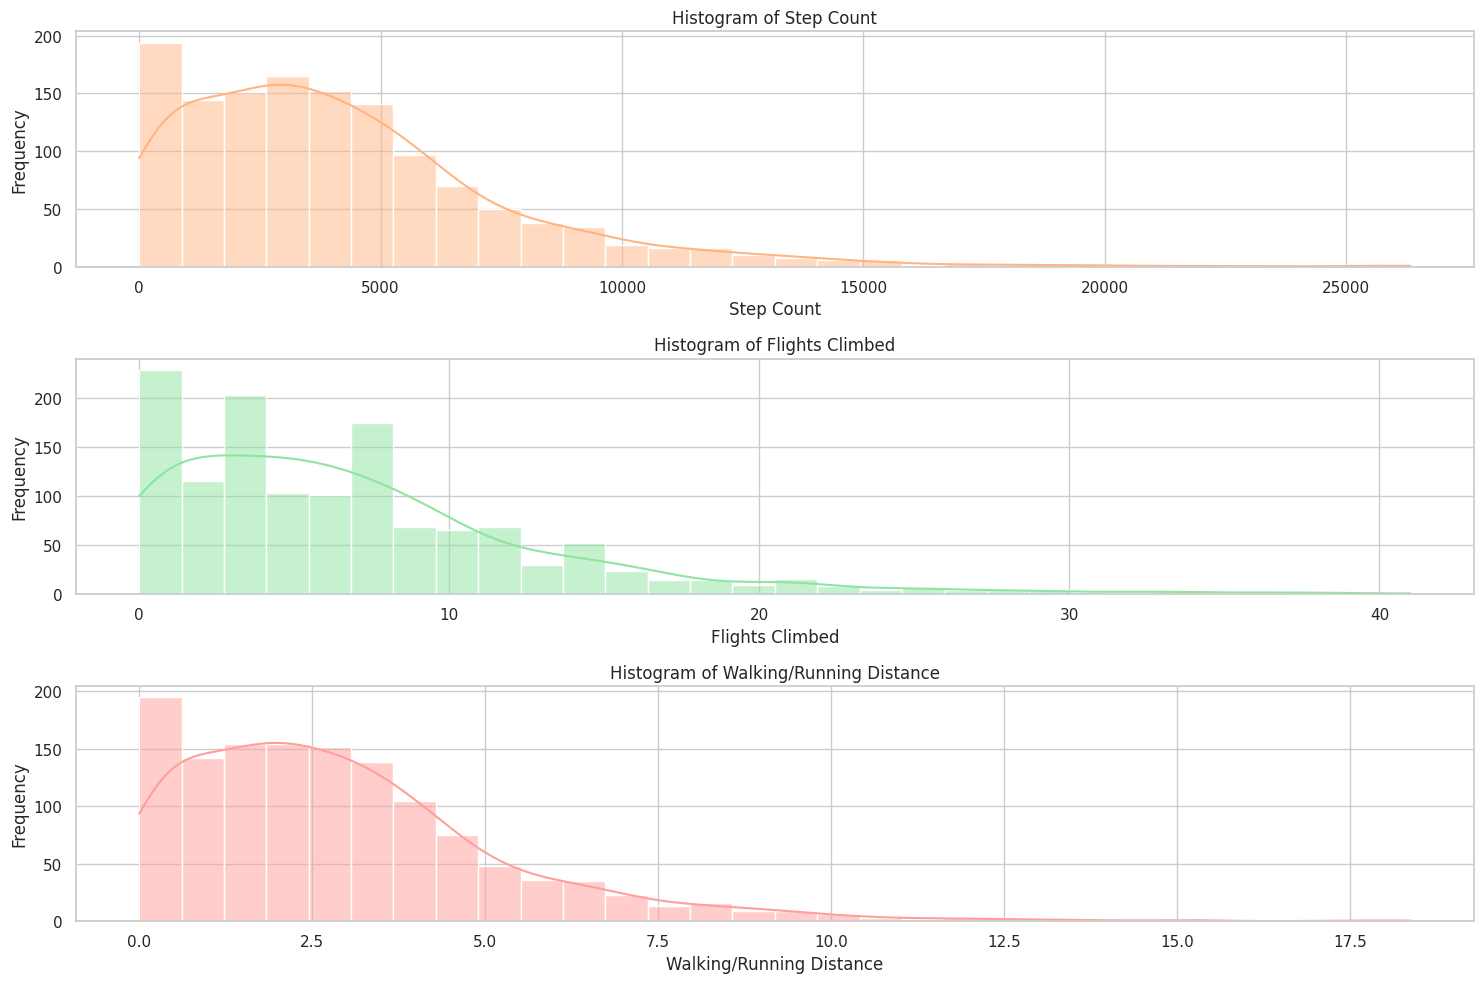

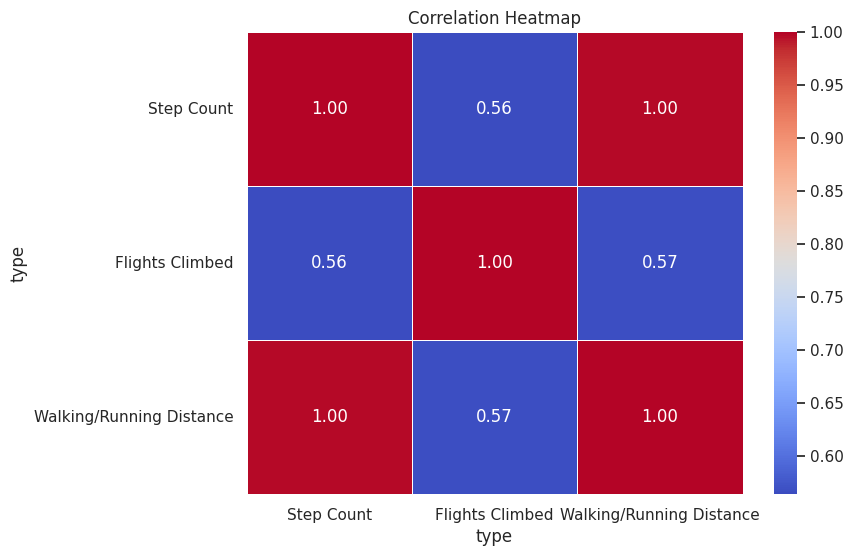

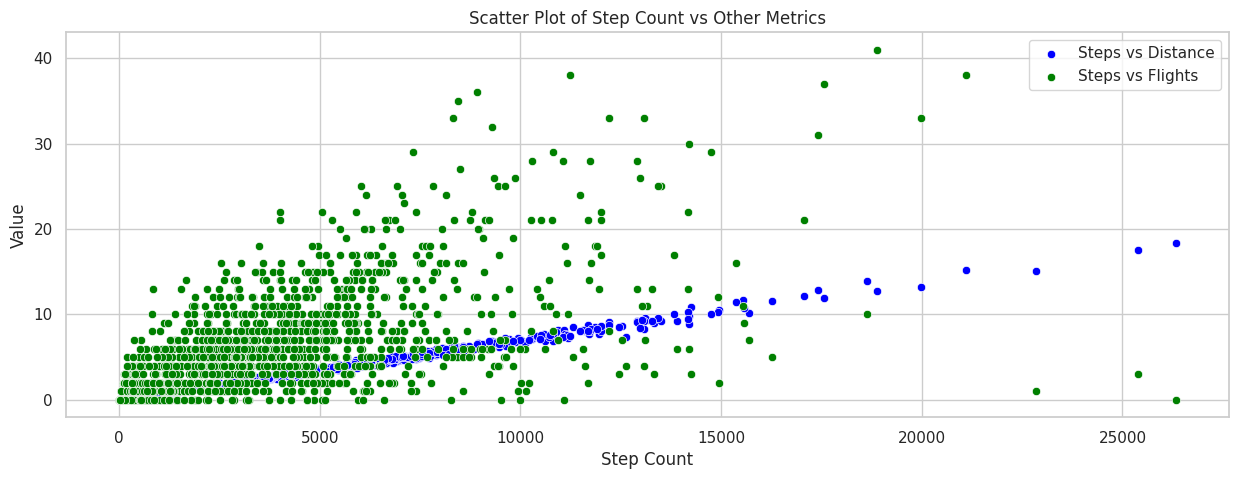

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # For structured table display

# Load the dataset
data = pd.read_csv("apple_health_combined_data.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Pivot the data to have separate columns for each activity type
data_pivot = data.pivot(index='date', columns='type', values='value')
data_pivot.reset_index(inplace=True)

# Rename columns for clarity
data_pivot.rename(columns={
    'StepCount': 'Step Count',
    'FlightsClimbed': 'Flights Climbed',
    'DistanceWalkingRunning': 'Walking/Running Distance'
}, inplace=True)

# Dataset Information
dataset_info = {
    "Number of Entries": len(data_pivot),
    "Number of Columns": len(data_pivot.columns),
    "Columns": list(data_pivot.columns),
    "Non-Null Counts": data_pivot.count().to_dict(),
    "Data Types": data_pivot.dtypes.to_dict(),
    "Memory Usage (KB)": round(data_pivot.memory_usage(deep=True).sum() / 1024, 2),
}
print("Dataset Information:")
print(tabulate(dataset_info.items(), headers=["Attribute", "Value"], tablefmt="pretty"))

# Descriptive Statistics
descriptive_stats = data_pivot.describe(include='all').transpose()
print("\nDescriptive Statistics:")
print(tabulate(descriptive_stats, headers="keys", tablefmt="pretty"))

# Histograms for all metrics
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Step Count', 'Flights Climbed', 'Walking/Running Distance'], 1):
    plt.subplot(3, 1, i)
    sns.histplot(data_pivot[column], bins=30, kde=True, color=sns.color_palette("pastel")[i])
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
correlation_matrix = data_pivot[['Step Count', 'Flights Climbed', 'Walking/Running Distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots to visualize relationships
plt.figure(figsize=(15, 5))
sns.scatterplot(x=data_pivot['Step Count'], y=data_pivot['Walking/Running Distance'], color='blue', label='Steps vs Distance')
sns.scatterplot(x=data_pivot['Step Count'], y=data_pivot['Flights Climbed'], color='green', label='Steps vs Flights')
plt.title("Scatter Plot of Step Count vs Other Metrics")
plt.xlabel("Step Count")
plt.ylabel("Value")
plt.legend()
plt.show()


# Period Tracker App

# Period Dates

<ipython-input-13-8b53c14c1341>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=period_counts.index, y=period_counts.values, palette="viridis")


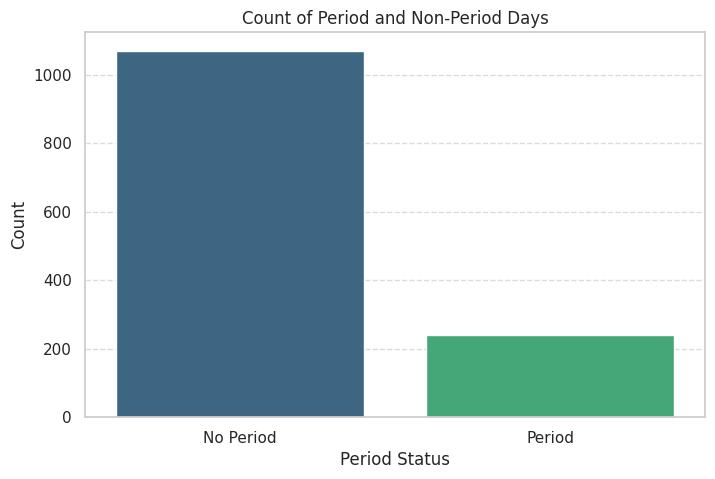

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("all_dates_with_period_flags.csv")

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Create a column to highlight periods
data['Period Highlight'] = data['is_period'].replace({1: "Period", 0: "No Period"})

# Bar Chart: Count of Period and No Period Days
period_counts = data['Period Highlight'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=period_counts.index, y=period_counts.values, palette="viridis")
plt.title("Count of Period and Non-Period Days")
plt.xlabel("Period Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Phases

Invalid rows detected and removed:
      Phase Start Date   End Date
3    Luteal 2021-05-24 2021-05-08
7    Luteal 2021-05-25 2021-05-09
11   Luteal 2021-05-26 2021-05-10
19   Luteal 2021-06-20 2021-06-04
23   Luteal 2021-06-21 2021-06-05
..      ...        ...        ...
931  Luteal 2024-11-23 2024-11-07
939  Luteal 2024-12-19 2024-12-03
943  Luteal 2024-12-20 2024-12-04
947  Luteal 2024-12-21 2024-12-05
951  Luteal 2024-12-22 2024-12-06

[191 rows x 3 columns]


<ipython-input-16-ab3c5a1ae9f0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration (Days)'] = (data['End Date'] - data['Start Date']).dt.days
<ipython-input-16-ab3c5a1ae9f0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_duration, x='Phase', y='Duration (Days)', palette="coolwarm")


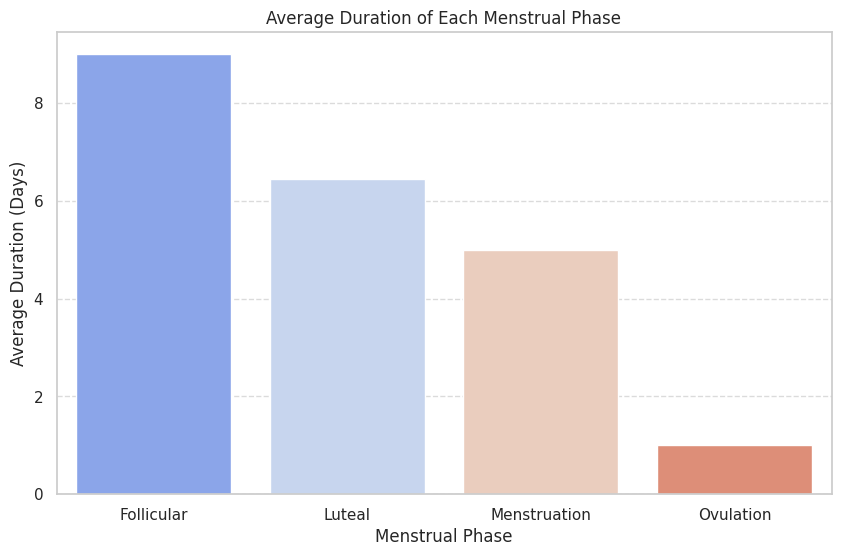

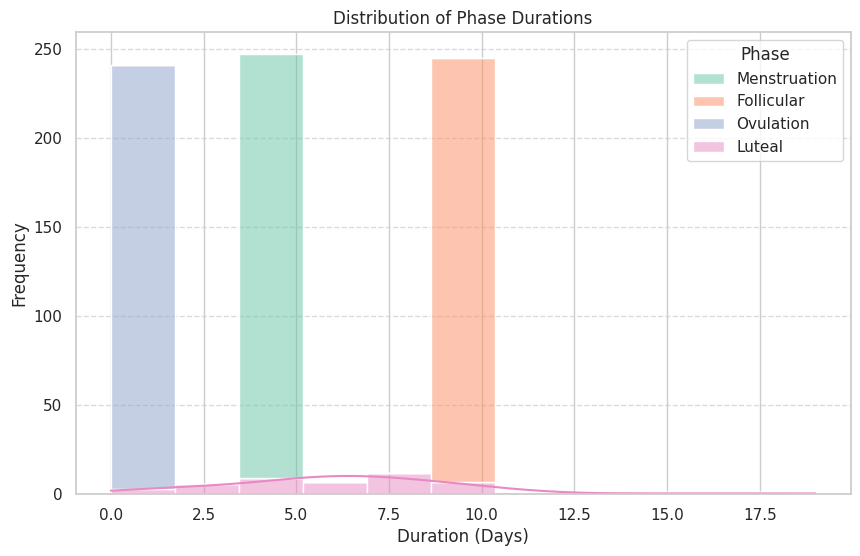

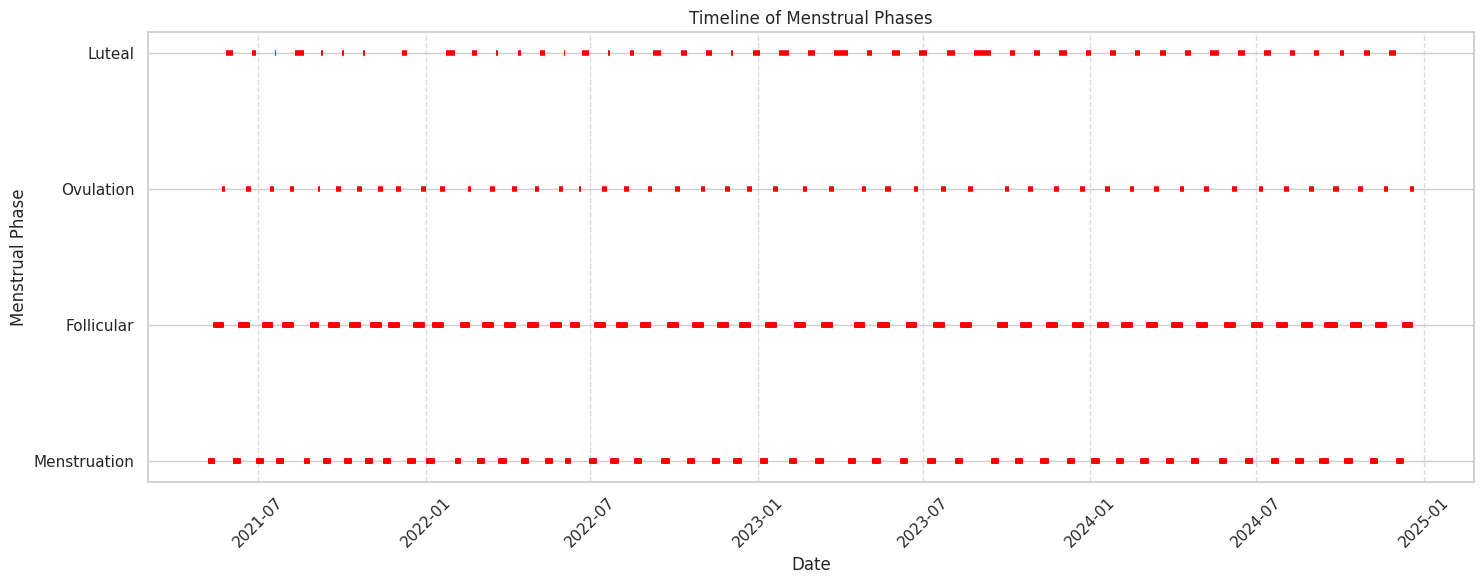

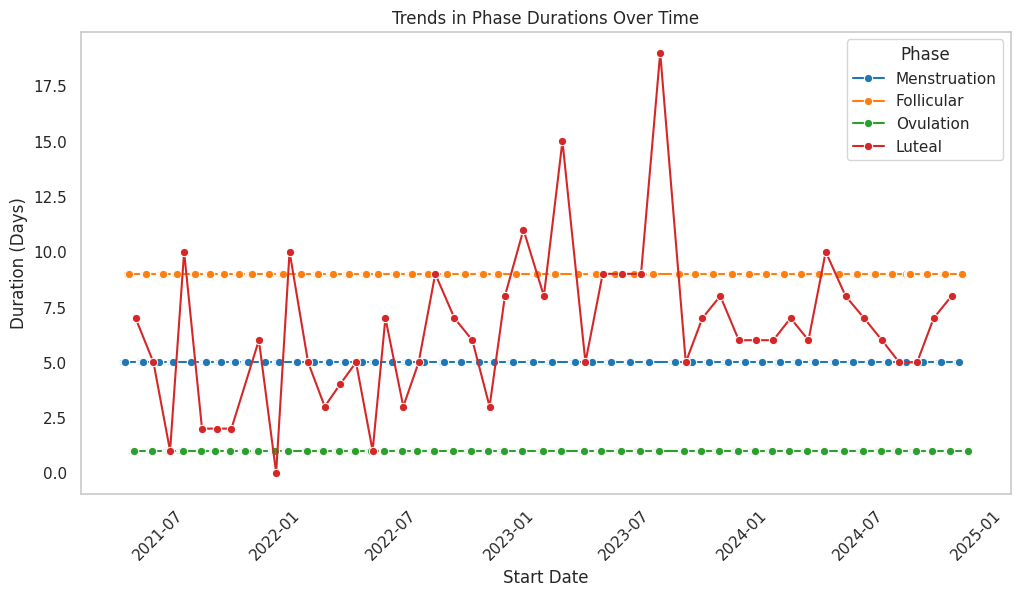

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("phase_date_ranges.csv")

# Convert date columns to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

# Identify and remove invalid rows where End Date < Start Date
invalid_rows = data[data['End Date'] < data['Start Date']]
if not invalid_rows.empty:
    print("Invalid rows detected and removed:")
    print(invalid_rows)
    # Remove invalid rows
    data = data[data['End Date'] >= data['Start Date']]

# Calculate Duration (Days)
data['Duration (Days)'] = (data['End Date'] - data['Start Date']).dt.days

# 1. Bar Chart: Average Duration of Each Phase
average_duration = data.groupby('Phase')['Duration (Days)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_duration, x='Phase', y='Duration (Days)', palette="coolwarm")
plt.title("Average Duration of Each Menstrual Phase")
plt.xlabel("Menstrual Phase")
plt.ylabel("Average Duration (Days)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Histogram: Distribution of Phase Durations
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Duration (Days)', hue='Phase', kde=True, palette="Set2", multiple="stack")
plt.title("Distribution of Phase Durations")
plt.xlabel("Duration (Days)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Timeline Chart: Phases Over Time
plt.figure(figsize=(15, 6))
for i, row in data.iterrows():
    plt.hlines(y=row['Phase'], xmin=row['Start Date'], xmax=row['End Date'], colors='red', lw=4, label=row['Phase'] if i == 0 else "")
plt.title("Timeline of Menstrual Phases")
plt.xlabel("Date")
plt.ylabel("Menstrual Phase")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Line Chart: Trends in Phase Durations Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Start Date', y='Duration (Days)', hue='Phase', marker='o', palette="tab10")
plt.title("Trends in Phase Durations Over Time")
plt.xlabel("Start Date")
plt.ylabel("Duration (Days)")
plt.xticks(rotation=45)
plt.grid()
plt.legend(title="Phase")
plt.show()
